In [2]:
include("DiscreteMaps.jl")
using DiscreteMaps, HDF5, JLD, PyPlot, Distributions
path = "results/lrb";

INFO: Loading help data...


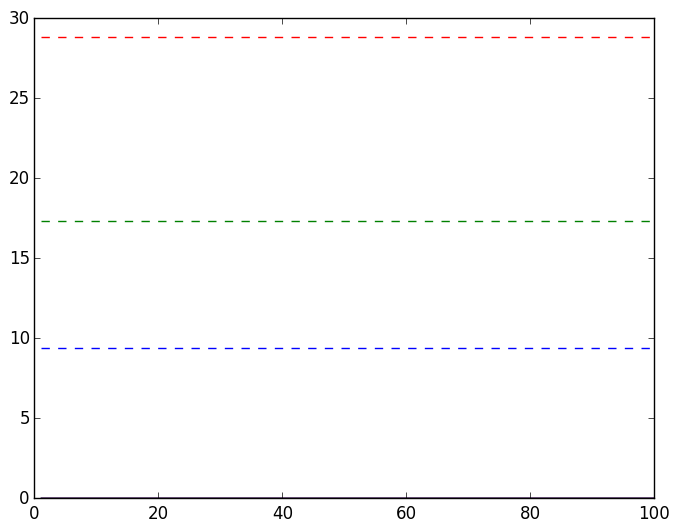

0

In [16]:
    
NSin = 100
NPhas = 30
#deps = 1e-6
M = 20
N = 80000
rundate="2015-06-30"
plot( ([1:NSin]),fill(quantile(Chisq(M-2),[0.05,0.5,0.95]),NSin),"--")
hold(true)
for deps in [1:9]*1e-6#, N in [40000,60000,80000]

    quantiles = [0.,0.25,0.5,0.75,1.]
    QL = length(quantiles)
    quantilev = zeros(NSin,NPhas,QL)

    for p = 1:NPhas
        extrastuff = ["-$(deps)-","-$(M)-","-$(N)-",rundate,"-$(round(p/NPhas,3))-"]
        files = DiscreteMaps.searchdirh5(path,"Lh")
        for str in extrastuff
            files = filter(x->contains(x,"$(str)"),files)
        end
          FL = length(files)
     #   (println(FL, " files found"))
        FL == 0 && continue
        pvals = Array(Float64,NSin,FL)
        for fi = 1:FL
            L = JLD.load("$(path)/$(files[fi])")
            pvals[:,fi] = DiscreteMaps.checklinearresponse(L["epsv"],L["eA"][1:NSin,:],L["vA"][1:NSin,:])[1]
        end
        for i = 1:NSin
            quantilev[i,p,:] = quantile(vec(pvals[i,:]),quantiles)
        end
    end


    # fig = PyPlot.figure()
    # ax = PyPlot.gca()

#    plt = plot(#repmat([1:NSin]',FL,1),pvals',"k.",
#    [1:NSin],quantilev[:,:,2],"b.",
#    [1:NSin],fill(quantile(Chisq(M-2),[0.05,0.5,0.95]),NSin)#repmat(quantiles',NSin,1)
#    ,"--");
    plt = plot(#repmat([1:NSin]',FL,1),pvals',"k.",
    [1:NSin]
  #  deps
    ,minimum(quantilev[:,:,3],2),"-");


end
hold(false)
#axis([0,NSin,1e-16,1]);
0

In [63]:
        extrastuff = ["-$(deps)-","-$(M)-","-$(N)-",rundate,"-$(round(10/NPhas,3))-"]
        files = DiscreteMaps.searchdirh5(path,"Lh")
        for str in extrastuff
            files = filter(x->contains(x,"$(str)"),files)
        end

ks = 68
va = zeros(size(JLD.load("$(path)/$(files[1])")["eA"][[7],:]'))
for i = 1:5
    L = JLD.load("$(path)/$(files[i])")
    plot(L["eA"][[ks],:]')
    hold(true)
    dmclr = DiscreteMaps.checklinearresponse(L["epsv"],L["eA"][1:NSin,:],L["vA"][1:NSin,:])
    va += L["eA"][[ks],:]' - (dmclr[3][ks] + dmclr[4][ks]*L["epsv"]).*sqrt(L["vA"][ks,:][:])/80000
end
hold(false)
plot(va)
#axis([0,20,-0.05,-0.02]);
checklinearresponse(L)[3]

LoadError: BoundsError()
while loading In[63], in expression starting on line 9

In [185]:
deps_crit vs N for A = sin(x). Hope deps_crit ~ N^-3/2
    
    then for deps > deps_c(N), hope take A = sin k(x - x_pt) and hope for --_--

LoadError: syntax: extra token "vs" after end of expression
while loading In[185], in expression starting on line 1

In [201]:
include("../Specacim/DiscreteMaps.jl")
using DiscreteMaps
gs = DiscreteMaps.criticalorbit(DiscreteMaps.logistic(3.8)).mag |> println

[0.5129891760425771
 0.2773927772077526
 0.1780134926840083
 0.2591299639225074
 0.14245987945869001
 0.09941190177042715
 0.08680901221424346
 0.0542549155101509
 0.14345987779648195
 0.07769048045232538
 0.05021943571353547
 0.06734188378629848
 0.03726658481243907
 0.02695602168403645
 0.021354181335058432
 0.014562022533437509
 0.013835029183363282
 0.00825868465841375
 0.011477729186155097
 0.0063317524063810525
 0.004501131075675547
 0.0037224207304112117
 0.002427693966583756
 0.0029967716314827854
 0.001674028648310165
 0.0012783267897511356
 0.0009155374338819563
 0.0007426839445294241
 0.0004934445997100272
 0.0005339163875520105
 0.0003054583361922263
 0.0002735183208502456
 0.0001682667567944215
 0.0006324775793625225
 0.00034213001922116216
 0.0002199460239800841
 0.00031335299887704854
 0.0001725308757476124
 0.0001213775413687152
 0.00010336809668929764
 6.57789360276959e-5
 0.00010800559402984843
 5.899911549560125e-5
 3.9819748701275964e-5
 3.961570055840278e-5
 2.3224

50-element Array{Float64,1}:
 0.95    
 0.1805  
 0.562095
 0.935348
 0.229794
 0.672557
 0.836851
 0.518819
 0.948654
 0.185096
 0.573174
 0.929653
 0.248514
 ⋮       
 0.681422
 0.824927
 0.548805
 0.940949
 0.211145
 0.632938
 0.882845
 0.393034
 0.906522
 0.322013
 0.829618
 0.537137